<a href="https://colab.research.google.com/github/288756/VisArtificial/blob/master/Prac03_Brillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3: Brillo y contraste**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

# Histograma

Para analizar el brillo y el contraste de una imagen es importante entender el histograma de intensidades. Para ello se va a comenzar la práctica realizando una función para visualizar una imagen junto a su histograma.


> Implementa una función que dada una imagen realice una visualización conjunta tanto de la imagen como de su histograma y distribución acumulada siguiendo las indicaciones que se muestran a continuación:
>
> Se debe verificar que la imagen es de tipo uint8. El histograma tendrá 256 bins, desde 0 a 255
>
> La función debe permitir el uso de imágenes en color o de imágenes en escala de grises
>
> Para calcular el histograma se debe implementar una función propia
>

A continuación se muestra algo de ayuda.



In [1]:
# Importar bibliotecas que pueden ser necesarias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import skimage

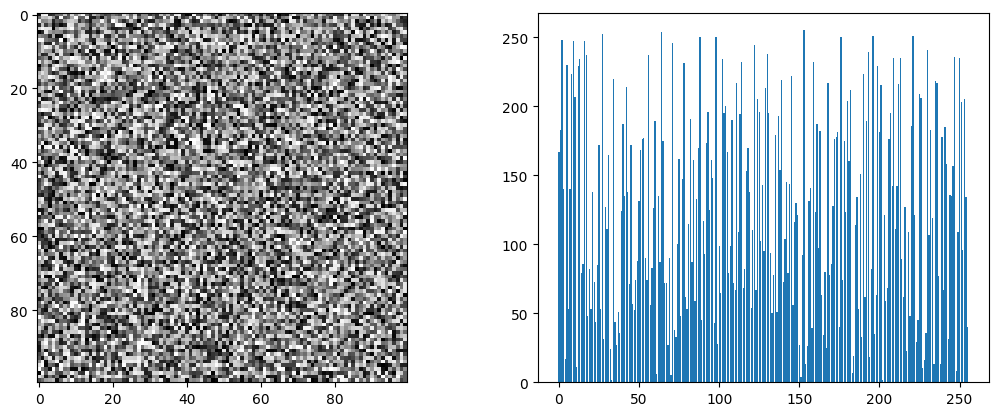

In [2]:
# Creación de la figura
width, height = plt.rcParams['figure.figsize']
fig, (ax_img, ax_hist) = plt.subplots(1, 2, figsize=(2*width, height))

# La primera se usará para la imagen, la segunda para el histograma

# Ejemplo de visualización de la imagen
img = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)
ax_img.imshow(img, cmap='gray')

# Ejemplo de visualización del histograma
hist = np.random.randint(0, 256, size=(256,), dtype=np.uint8)
ax_hist.bar(np.arange(256), hist)
plt.show()

In [3]:
def iter_channels(color_image):
    for channel in np.rollaxis(color_image, -1):
        yield channel

# Función para visualizar el histograma de una imagen
# Esta función está sin terminar
def plot_histogram(img):
  # Creación de la figura
  if img.dtype == "uint8":
    width, height = plt.rcParams['figure.figsize']
    fig, (ax_img, ax_hist) = plt.subplots(1, 2, figsize=(2*width, height))
    hist = np.zeros(256)
    def hist_e_imagen(img, hist):
        hist = np.zeros(256)
        for i in range(img.shape[0]):
          for j in range(img.shape[1]):
            hist[img[i,j]] += 1
        return ax_img.imshow(img, cmap='gray'), ax_hist.bar(np.arange(256), hist)
    if img.ndim == 2:
      hist_e_imagen(img, hist)
    elif img.ndim == 3:
        # imagen en color
        # `channel` es el canal rojo, verde o azul de la imagen.
        for channel, channel_color in zip(iter_channels(img), 'rgb'):
            ax_img.imshow(img, cmap='gray')
            # crear histograma de cada canal
            hist = np.zeros(256)
            for i in range(img.shape[0]):
              for j in range(img.shape[1]):
                hist[channel[i,j]] += 1
            ax_hist.bar(np.arange(256), hist)
        plt.show()
  else:
    print("NO ES UINT8")

In [4]:
img = skimage.io.imread('kida.jpg')
plot_histogram(img)

FileNotFoundError: No such file: '/content/kida.jpg'

## Ajuste de contraste lineal

Una vez que se tiene la visualización del histograma se puede analizar mejor el brillo y el contraste. También es más fácil entender cómo funcionan los métodos de ajuste de contraste.

> Crea una función que realice un ajuste de intensidad afín usando la ecuación $s = ra+b$, donde $s$ es el valor del píxel de salida, $r$ el de entrada y $a$ y $b$ son dos constantes. La función debe evitar que el resultado se salga del rango de representación (`np.clip`). Para ello se recomienda realizar una conversión a flotante para realizar las operaciones (`img.astype(np.double)`). Después de la operación se debe volver a convertir a su formato original.

> Prueba con diversos valores de $a$ y $b$ y analiza el resultado.


> Realiza la normalización de la imagen usando $r_{norm} =  \frac{r - r_{min}} {r_{max} - r_{min}}$, donde $r_{min}$ es el valor de intensidad mínimo de la imagen, y  $r_{max}$ es el máximo. Este tipo de normalización (min-max normalization) debe retornar una imagen en el rango [0, 1]. En el caso de imagen de color, realiza este proceso para cada canal.

> Convierte la imagen normalizada al rango [0, 255] (se consigue simplemente multiplicando por 255).

> Repite el proceso usando el percentil 2 y 98 como valores de $r_{min}$ y $r_{max}$.

> Usa las técnicas anteriores para visualizar la imagen `http://www.atc.uniovi.es/grado/3va/prac/convection.png`




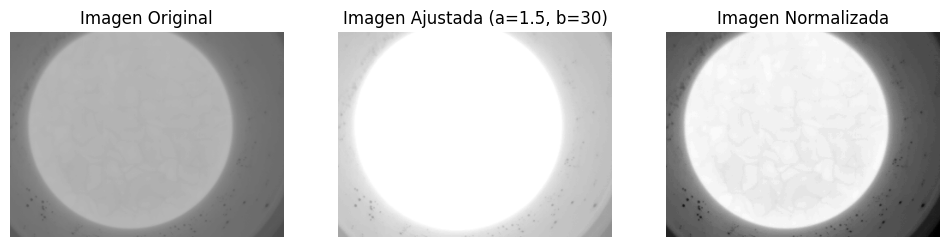

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def cargar_imagen_desde_url(url):
    response = requests.get(url)
    imagen = Image.open(BytesIO(response.content))
    return np.array(imagen)

def ajuste_intensidad_afin(img, a, b):
    # Convertir la imagen a flotante para realizar operaciones
    img_float = img.astype(float)
    # Aplicar la ecuación de ajuste
    img_ajustada = np.clip(img_float * a + b, 0, 255)
    # Convertir de nuevo al tipo de datos original de la imagen
    img_ajustada = img_ajustada.astype(img.dtype)
    return img_ajustada

def normalizar_imagen(img):
    # Calcular el mínimo y máximo de la imagen
    rmin, rmax = np.min(img), np.max(img)
    # Normalizar la imagen al rango [0, 1]
    img_normalizada = (img - rmin) / (rmax - rmin)
    # Convertir al rango [0, 255]
    img_normalizada *= 255
    # Convertir a tipo de datos entero
    img_normalizada = img_normalizada.astype(np.uint8)
    return img_normalizada

def ajustar_y_visualizar_imagen(url, a, b):
    # Cargar la imagen desde la URL
    img = cargar_imagen_desde_url(url)

    # Realizar ajuste de intensidad afín
    img_ajustada = ajuste_intensidad_afin(img, a, b)

    # Normalizar la imagen
    img_normalizada = normalizar_imagen(img)

    # Visualizar las imágenes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_ajustada, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen Ajustada (a={a}, b={b})')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_normalizada, cmap='gray')
    plt.title('Imagen Normalizada')
    plt.axis('off')

    plt.show()

# Prueba con la imagen proporcionada
url_imagen = "http://www.atc.uniovi.es/grado/3va/prac/convection.png"
a, b = 1.5, 30
ajustar_y_visualizar_imagen(url_imagen, a, b)



# Ajuste de contraste no lineal

También es posible realizar ajuste con transformaciones no lineales. Una de las posibilidades es el ajuste de sigmoide, $s = \frac{1}{1 + e^{(\mathrm{cutoff} - r)\mathrm{gain}}}$ donde $s$ es el valor de píxel transformado, $r$ es la intensidad de entrada y $\mathrm{cutoff}$ y $\mathrm{gain}$ son parámetros. Esta ecuación asume que los valores de entrada están normalizados en el intervalo [0, 1].

> Realiza la representación de la función de transformación para $\mathrm{cutoff} = 0.5$ y $\mathrm{gain} = 12$.



Ahora realiza esta mejora de contraste en la imagen `http://www.atc.uniovi.es/grado/3va/prac/persona.png`.


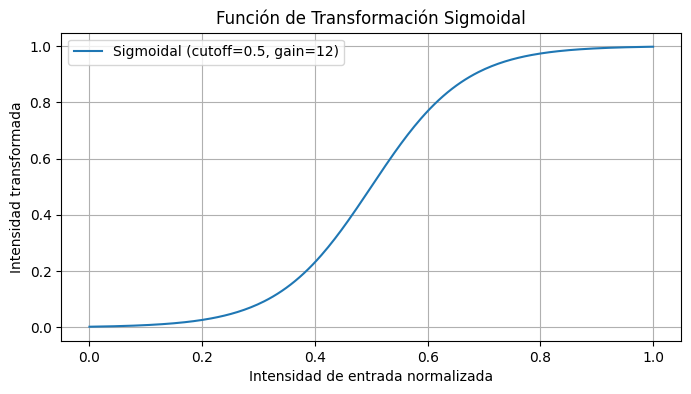

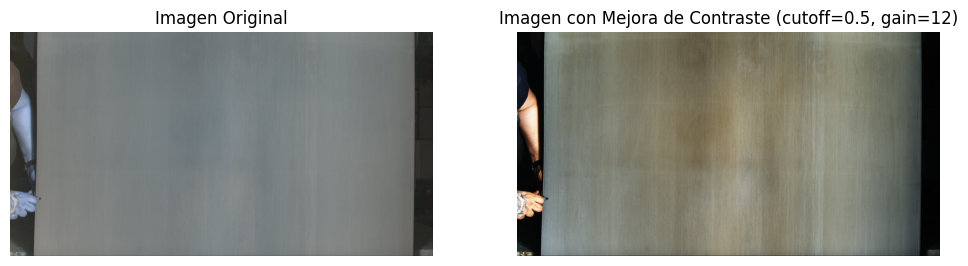

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

def sigmoid_transform(r, cutoff, gain):
    s = 1 / (1 + np.exp((cutoff - r) * gain))
    return s

# Representación de la función de transformación sigmoidal
cutoff = 0.5
gain = 12
intensidades = np.linspace(0, 1, 256)
transformaciones = sigmoid_transform(intensidades, cutoff, gain)

plt.figure(figsize=(8, 4))
plt.plot(intensidades, transformaciones, label=f'Sigmoidal (cutoff={cutoff}, gain={gain})')
plt.title('Función de Transformación Sigmoidal')
plt.xlabel('Intensidad de entrada normalizada')
plt.ylabel('Intensidad transformada')
plt.legend()
plt.grid(True)
plt.show()

# Aplicar mejora de contraste a la imagen
url_imagen = "http://www.atc.uniovi.es/grado/3va/prac/persona.png"
imagen = io.imread(url_imagen)
imagen_normalizada = imagen.astype(float) / 255.0  # Normalizar la imagen al intervalo [0, 1]
imagen_transformada = sigmoid_transform(imagen_normalizada, cutoff, gain)

# Visualizar las imágenes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_transformada, cmap='gray')
plt.title(f'Imagen con Mejora de Contraste (cutoff={cutoff}, gain={gain})')
plt.axis('off')

plt.show()
